# Test d'hypothèses dans le modèle binomial

Dans ce TP, on se propose d'illustrer certains résultats théoriques étudiés en cours et en TD, dans le cadre du modèle binomial.

On travaillera donc avec une suite de variables aléatoires $X_1, \dots, X_n$, indépendantes et de même loi de Bernoulli $\mathcal{B}(p)$, avec $p$ inconnu. On définit $S_n = \sum_{i=1}^n X_i$.

On considère le test d'hypothèse suivant :

$$ H_0 : p \in \Theta_0 \quad \text{ contre } \quad H_1 : p \in \Theta_1, $$

où $\Theta_0$ et $\Theta_1$ sont deux sous-ensembles disjoints de $[0,1]$.

## Test d'hypothèses simples

Dans cette partie, on s'intéresse au cas d'*hypothèses simples*, c'est-à-dire telles que $\Theta_0$ et $\Theta_1£ sont réduites à un singleton. On écrit alors :

$$ H_0 : p = p_0 \quad \text{ contre } \quad H_1 : p = p_1,$$

et on a donc $\Theta_0 = \{p_0\}$ et $\Theta_1 = \{p_1\}$.

### Zone de rejet

On reprend l'exemple de l'exercice 4 de la fiche de TD 1, où l'on a $n=50$, $p_0 = 3/4$ et $p_1=9/16$. On commence par définir ces quantités.

In [49]:
# importation des librairies Python utiles
from scipy import stats
from scipy.stats import binom, poisson, norm
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
n = 50
p0 = 3/4
p1 = 9/16

On va construire la région de rejet pour les niveaux suivants : 10%, 6%, 5%, 2% et 1%. On construit un vecteur qui va contenir ces valeurs.

In [3]:
alpha = [0.10,0.06,0.05,0.02,0.01]

La région de rejet est de la forme $\{S_n \leq k_\alpha\}$. On calcule $k_\alpha$ à l'aide de la fonction ppf (inverse de la fonction de répartition):

In [4]:
k = binom.ppf(alpha,n,p0)

Traçons la fonction de répartition de la loi binomiale de paramètres $n=50$ et $p=p_0$. 

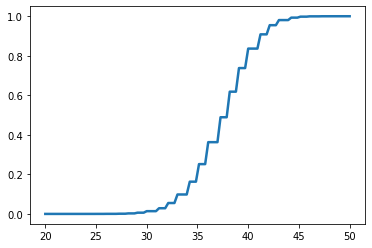

In [5]:
x = np.linspace(20,50,100)
plt.plot(x,binom.cdf(x, n, p0), linewidth=2.5)
plt.show()

On peut visualiser le lien entre niveau du test et région de rejet.

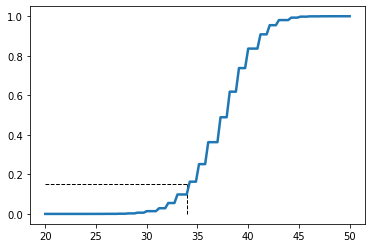

In [7]:
x = np.linspace(20,50,100)
y = binom.cdf(x, n, p0)
plt.plot(x,y,linewidth=2.5)

# Coloration de l'aire sous la courbe de la fonction de répartition et ajout d'une ligne horizontale 
# au niveau alpha souhaité
niveau = 0.15
seuil_rejet = binom.ppf(niveau,n,p0)
plt.hlines(niveau,20,seuil_rejet,linewidth=1,linestyle="--")
plt.vlines(seuil_rejet,0,niveau,linewidth=1,linestyle="--")

### Puissance
On va maintenant calculer la puissance du test pour chaque niveau $\alpha$ défini précédemment. La puissance se calcule après avoir défini la région de rejet. On la calcule à l'aide de la fonction de répartition de la loi binomiale.

In [8]:
puissance = binom.cdf(k,n,p1)
print(puissance)

[0.96705527 0.93873448 0.8946799  0.83186134 0.74957269]


L'erreur de deuxième espèce est définie comme $1-\pi$ où $\pi$ est la fonction puissance. On remarque effectivement qu'en augmentant l'erreur de première espèce (ou niveau) $\alpha$, on diminue l'erreur de deuxième espèce, et vice versa.

In [9]:
beta = 1-puissance
print(beta)

[0.03294473 0.06126552 0.1053201  0.16813866 0.25042731]


On peut visualiser le lien entre niveau et puissance à l'aide du graphe suivant :

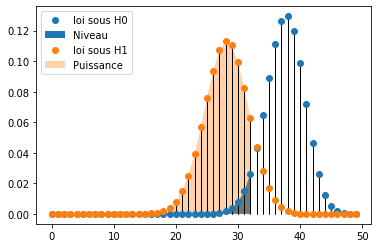

In [10]:
# valeurs des fonctions de répartition sous H0 et sous H1
x = np.arange(0,50,1)
pdfH0 = binom.pmf(x,n,p0)
pdfH1 = binom.pmf(x,n,p1)

# configuration du graphe
fig, ax = plt.subplots()
pdf0 = ax.plot(x,pdfH0,'o')
ax.vlines(x,0,pdfH0,lw=1)
pdf1 = ax.plot(x,pdfH1,'o')
ax.vlines(x,0,pdfH1,lw=1)

# Visualisation du niveau et de la puissance au niveau alpha souhaité
niveau = alpha[1]
seuil_rejet = binom.ppf(niveau,n,p0)
x2 = np.arange(0,seuil_rejet,1)
y2_H0 = binom.pmf(x2, n, p0)
y2_H1 = binom.pmf(x2, n, p1)
auc0 = ax.fill_between(x2,y2_H0,0,linewidth=2.5,alpha=1) # attention ici alpha est un paramètre de transparence graphique !
auc1 = ax.fill_between(x2,y2_H1,0,linewidth=2.5,alpha=0.35)

ax.legend((pdf0[0],auc0,pdf1[0],auc1), ('loi sous H0', 'Niveau', 'loi sous H1', 'Puissance'))

In [ ]:
Et le lien entre erreur de première espèce se lit sur le graphe suivant :

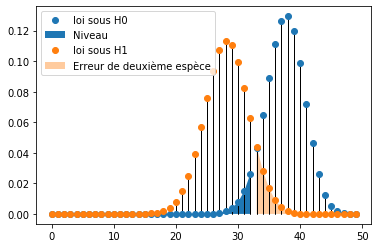

In [11]:
# configuration du graphe
fig, ax = plt.subplots()
pdf0 = ax.plot(x,pdfH0,'o')
ax.vlines(x,0,pdfH0,lw=1)
pdf1 = ax.plot(x,pdfH1,'o')
ax.vlines(x,0,pdfH1,lw=1)

# Visualisation du niveau et de la puissance au niveau alpha souhaité
niveau = alpha[1]
seuil_rejet = binom.ppf(niveau,n,p0)
x2 = np.arange(0,seuil_rejet,1)
y2_H0 = binom.pmf(x2, n, p0)
x3 = np.arange(seuil_rejet,50,1)
y3_H1 = binom.pmf(x3, n, p1)
auc0 = ax.fill_between(x2,y2_H0,0,linewidth=2.5,alpha=1) # attention ici alpha est un paramètre de transparence graphique !
err2esp = ax.fill_between(x3,y3_H1,0,linewidth=2.5,alpha=0.4)

ax.legend((pdf0[0],auc0,pdf1[0],err2esp), ('loi sous H0', 'Niveau', 'loi sous H1', 'Erreur de deuxième espèce'))

On peut tracer la puissance en fonction de $n$. Pour cela, fixons le niveau du test, et calculons le seuil de rejet correspondant ainsi que la puissance associée, pour différentes valeurs de $n$ allant de 10 à 200. On peut superposer plusieurs courbes sur le même graphe, correspondant à différentes valeurs pour le niveau.

[  6.   9.  12.  16.  19.  23.  26.  30.  34.  37.  41.  44.  48.  51.
  55.  59.  62.  66.  69.  73.  77.  80.  84.  87.  91.  95.  98. 102.
 106. 109. 113. 117. 120. 124. 128. 131. 135. 138.]
[0.6        0.6        0.6        0.64       0.63333333 0.65714286
 0.65       0.66666667 0.68       0.67272727 0.68333333 0.67692308
 0.68571429 0.68       0.6875     0.69411765 0.68888889 0.69473684
 0.69       0.6952381  0.7        0.69565217 0.7        0.696
 0.7        0.7037037  0.7        0.70344828 0.70666667 0.70322581
 0.70625    0.70909091 0.70588235 0.70857143 0.71111111 0.70810811
 0.71052632 0.70769231]


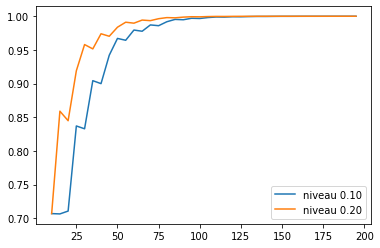

In [25]:
niveau = 0.10
n = np.arange(10,200,5)
seuil_rejet =  binom.ppf(niveau,n,p0)
print(seuil_rejet)
# si on ramène le seuil de rejet à une proportion entre 0 et 1, on s'aperçoit que ce seuil augmente lorsque n 
# augmente : autrement dit, plus n est grand, plus on est capable de détecter de petites différences entre
# H0 et H1. Avec n=10000, on rejette si on observe une proportion inférieure ou égale à 74,29% au lieu de 75%
# sous H0.
print(seuil_rejet/n)

plt.plot(n,binom.cdf(seuil_rejet,n,p1), label="niveau 0.10")

niveau = 0.20
seuil_rejet =  binom.ppf(niveau,n,p0)
plt.plot(n,binom.cdf(seuil_rejet,n,p1), label="niveau 0.20")
plt.legend()

## Test d'hypothèses composites

On s'intéresse d'abord au test unilatéral suivant :
$$ H_0 : p = p_0 \quad \text{ contre } \quad H_1 : p > p_0.$$

On a donc $\Theta_0 = \{p_0\}$ et $\Theta_1 = ]p_0,1]$.

On reprend l'exercice 6 sur le lancer d'une pièce de monnaie. On veut tester l'hypothèse nulle selon laquelle la pièce est équilibrée, contre l'hypothèse alternative selon laquelle elle est truquée et renvoie plus de "piles" que de "faces".

### Puissance
On s'intéresse tout d'abord à la puissance. On trace la fonction puissance en fonction de $p$, pour $n=20$ et $\alpha=5\%$ (taille du test).

8.0
14.0
31.0


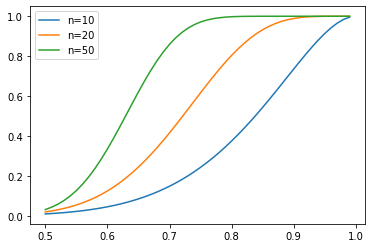

In [47]:
# construction de la région de rejet
n=10
niveau=0.05
seuil_rejet = binom.ppf(0.95,n,0.5)
print(seuil_rejet)

# calcul de la puissance, une fois que la zone de rejet a été définie
p1 = np.arange(0.5,1,0.01)
puissance = 1-binom.cdf(seuil_rejet,n,p1)

plt.plot(p1,puissance,label="n=10")

# on peut aussi faire varier n comme dans la question précédente
n=20
seuil_rejet = binom.ppf(0.95,n,0.5)
print(seuil_rejet)

puissance = 1-binom.cdf(seuil_rejet,n,p1)

plt.plot(p1,puissance,label="n=20")

n=50
seuil_rejet = binom.ppf(0.95,n,0.5)
print(seuil_rejet)

puissance = 1-binom.cdf(seuil_rejet,n,p1)

plt.plot(p1,puissance,label="n=50")

plt.legend()

### Simulations
Dans cette partie, on va simuler plusieurs réalisations de l'expérience aléatoire consistant à lancer $n$ fois une pièce de monnaie. On note $M$ le nombre d'expériences aléatoires, c'est-à-dire le nombre de fois où on effectue $n$ lancers de pièce. On prend $n=10$.
Pour $m=1,\dots,M$, on va :
 * générer $n$ réalisations de variables aléatoires de Bernoulli de paramètre $p=0.5$
 * calculer la $m$-ème statistique de test basée sur ces $n$ observations
 * compter 1 si on rejette $H_0$ et 0 sinon
Après les $M$ tirages, on aura compté le nombre de fois où on a rejeter $H_0$. Comme on a dait toutes nos simulations en utilisant $p=0.5$, on s'est placé dans le cas où $H_0$ était vraie. On compte donc le nombre de fois où on a rejeté à tort. Ce nombre devrait être inférieur ou égal à $0.05*M$.

In [77]:
# on calcule la zone de rejet
n=10
niveau=0.05
seuil_rejet = binom.ppf(0.95,n,0.5)

nb_rejet = 0
M=1000
for m in range(1,M):
    echantillon = binom.rvs(10,0.5)
    stat_test = np.sum(echantillon)
    if stat_test > seuil_rejet: 
        nb_rejet+=1

print(nb_rejet/M)

0.011


### Croissance de l'erreur de première espèce
Dans l'exercice 5, on a montré que l'erreur de première espèce pour le test défini par :
$$ H_0 : p \leq p_0 \quad \text{contre} \quad H_1 : p > p_0$$

est une fonction croissance en $p$. On peut le voir en traçant la valeur de $\mathbb{P}_{p}(S_n \geq a)$, où $a$ est un seuil de rejet fixé, en fonction de $p$.

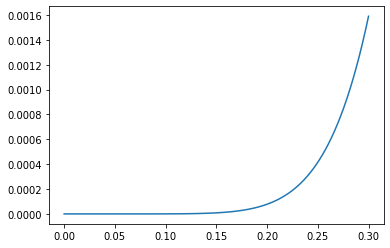

In [68]:
n=10
niveau=0.05
seuil_rejet = binom.ppf(0.95,n,0.5)
p = np.linspace(0,0.3,100)
err1esp = 1-binom.cdf(seuil_rejet-1,n,p)

plt.plot(p,err1esp)

## Approximation par la loi de Poisson
On s'intéresse dans cette partie à l'approximation de la loi Binomiale par la loi de Poisson. Cette approximation est valable pour une suite de variables aléatoires de loi $\mathcal{B}(n,p_n)$ avec $\lim\limits_{\substack{n \rightarrow + \infty}} np_n = \lambda > 0$. En pratique, elle est donc utilisée pour $n$ grand et $p$ petit.

On compare ci-dessous les distributions de la loi Binomiale $\mathcal{B}(n,p)$ et de la loi de Poisson $\mathcal{P}(np)$, pour différentes valeurs de $n$ et $p$.

30.0
[8.04606974e-14 2.43820295e-12 3.69301548e-11 3.72783179e-10
 2.82129088e-09 1.70759343e-08 8.60983555e-08 3.71974713e-07
 1.40570747e-06 4.72040040e-06]
[9.35762297e-14 2.80728689e-12 4.21093034e-11 4.21093034e-10
 3.15819775e-09 1.89491865e-08 9.47459326e-08 4.06053997e-07
 1.52270249e-06 5.07567496e-06]


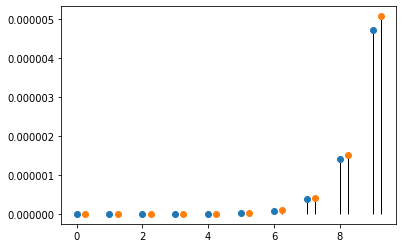

In [41]:
n=3000
p=0.01
print(n*p)

x = np.arange(0,10,1)
ybinom = binom.pmf(x,n,p)
ypoiss = poisson.pmf(x,n*p)

fig, ax = plt.subplots()
plbin = ax.plot(x,ybinom,'o')
ax.vlines(x,0,ybinom,lw=1)
plpois = ax.plot(x+0.25,ypoiss,'o')
ax.vlines(x+0.25,0,ypoiss,lw=1)


print(ybinom)
print(ypoiss)

Là aussi, on peut montrer la croissance en $\theta$ de la fonction $\mathbb{P}_{\theta}(X \geq a)$ pour $a$ fixé et $X$ de loi de Poisson.

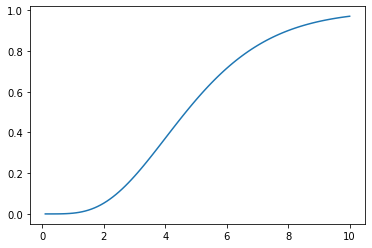

In [67]:
theta = np.linspace(0.1,10,100)
a = 5

err1esp = 1-poisson.cdf(a-1,theta)

plt.plot(theta,err1esp)

## Approximation par la loi normale
On s'intéresse maintenant à l'approximation de la loi binomiale par la loi normale. Cette approximation est valable lorsque $n$ est grand, quelle que soit la valeur de $p$. Lorsque $n$ est grand et $p$ petit, avec $\lim\limits_{\substack{n \rightarrow + \infty}} np_n = \lambda > 0$, si le $\lambda$ est grand, la loi de Poisson du paragraphe précédent peut également être approchée par la loi normale. Dans la pratique, on prendra l'approximation par la loi de Poisson si $\lambda$ est relativement faible (par ex. $<10$) et l'approximation par la loi normale si lambda est élevé (par ex. $> 10$).

Pour illustrer cette approximation, basée sur le théorème central limite, on génère plusieurs variables aléatoires de loi $\mathcal{B}(n,p)$ pour $n$ grand, et on trace l'histogramme des valeurs obtenues, que l'on compare à la densité de la loi normale centrée réduite. 

Faire varier $n$ et $p$ pour identifier les cas où l'approximation est meilleure.

500.0


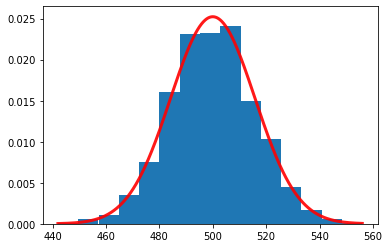

In [60]:
n=1000
p=0.5
print(n*p)
x = binom.rvs(n,p,size=10000)

plt.hist(x,bins=15,density=True)
xabs = np.linspace(min(x), max(x), 1000)
plt.plot(xabs, norm.pdf(xabs, n*p, math.sqrt(n*p*(1-p))),'r-', lw=3, alpha=0.9, label='norm pdf')


## Tests asymptotiques

